# Multiple Model Evaluations in Process: Convergence Improvement?

Run the models once-through or 6 times using the same optimisation parameter vector. Does this change the convergence?

In [43]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
RUN_COUNT = 1e3
data = {
    "run": [
        "large-tokamak",
        "large-tokamak",
        "SPR45",
        "SPR45",
        "SPR45_3fpy",
        "SPR45_3fpy",
        "stellarator",
        "stellarator",
        "bluemira",
        "bluemira",
        "demo",
        "demo",
        "SPR45-10",
        "SPR45-10",
        "SPR-045-15-3fpy\n-A_1.8",
        "SPR-045-15-3fpy\n-A_1.8",
        "SPR-045-15-3fpy\n-A_1.8_soln_ip",
        "SPR-045-15-3fpy\n-A_1.8_soln_ip",
    ],
    "evals": [1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6],
    "converged_runs": [
        12,
        18,
        0,
        0,
        0,
        0,
        0,
        0,
        6,
        22,
        12,
        18,
        0,
        0,
        0.179 * RUN_COUNT,
        0,
        0.195 * RUN_COUNT,
        0,
    ],
}


data["converged_frac"] = np.array(data["converged_runs"]) / RUN_COUNT

# Want to add latest STEP results to this, but timed out
# SPR-045-15-3fpy-A_1.8 had 844 runs (timed out), 151 solns = 0.179
# SPR-045-15-3fpy-A_1.8_soln_ip had 778 runs (timed out), 152 solns = 0.195

df = pd.DataFrame(data)
df

,run,evals,converged_runs,converged_frac
0,large-tokamak,1,12.0,0.012
1,large-tokamak,6,18.0,0.018
2,SPR45,1,0.0,0.000
3,SPR45,6,0.0,0.000
4,SPR45_3fpy,1,0.0,0.000
5,SPR45_3fpy,6,0.0,0.000
6,stellarator,1,0.0,0.000
7,stellarator,6,0.0,0.000
8,bluemira,1,6.0,0.006
9,bluemira,6,22.0,0.022


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SPR-045-15-3fpy\n-A_1.8'),
  Text(1, 0, 'SPR-045-15-3fpy\n-A_1.8_soln_ip'),
  Text(2, 0, 'SPR45'),
  Text(3, 0, 'SPR45-10'),
  Text(4, 0, 'SPR45_3fpy'),
  Text(5, 0, 'bluemira'),
  Text(6, 0, 'demo'),
  Text(7, 0, 'large-tokamak'),
  Text(8, 0, 'stellarator')])

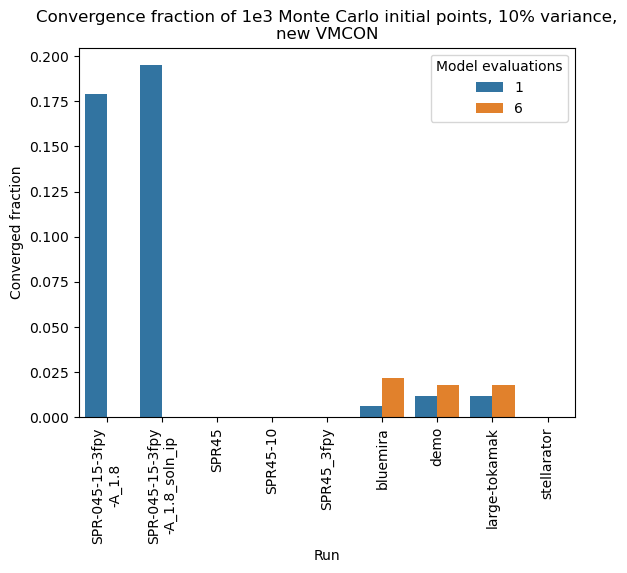

In [45]:
fig, ax = plt.subplots()
ax = sns.barplot(
    x="run", y="converged_frac", data=df.sort_values("run"), ci=None, hue="evals", ax=ax
)
ax.set_xlabel("Run")
ax.set_ylabel("Converged fraction")
ax.set_title(
    "Convergence fraction of 1e3 Monte Carlo initial points, 10% variance,\nnew VMCON"
)
ax.legend(title="Model evaluations")
plt.xticks(rotation=90)

# # Iterating over the bars one-by-one
# for bar in ax.patches:
#     label = bar.get_label()
#     ax.annotate(
#         format(bar.get_height(), ".2f"),
#         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
#         ha="left",
#         va="center",
#         size=12,
#         xytext=(0, 8),
#         textcoords="offset points",
#     )